# General settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
# output parameters 
pd.set_option("display.max_columns", 500) # number of columns
pd.set_option("display.max_rows", 1000) # number of lines
pd.set_option("display.max_colwidth", 300) # column width
pd.set_option("display.precision", 7) # number of decimal places

# disable unnecessary warnings
import warnings
warnings.filterwarnings("ignore") 

# printing all results in one cell, not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Color palette
sns.set_palette('Set2')
sns.color_palette()

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

# Data import

In [4]:
df = pd.read_csv('mxmh_survey_results.csv')
df.sample(5)
df.info()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
670,9/16/2022 1:47:01,21.0,YouTube Music,0.5,Yes,No,No,Pop,Yes,Yes,NaN,Never,Rarely,Never,Rarely,Never,Rarely,Rarely,Rarely,Never,Sometimes,Never,Very frequently,Rarely,Rarely,Sometimes,Rarely,5.0,3.0,4.0,1.0,Improve,I understand.
180,8/28/2022 19:46:02,17.0,Spotify,2.0,Yes,No,No,Rock,No,Yes,NaN,Never,Rarely,Rarely,Rarely,Never,Never,Never,Rarely,Never,Sometimes,Rarely,Sometimes,Never,Rarely,Very frequently,Very frequently,7.0,3.0,1.0,5.0,Improve,I understand.
99,8/28/2022 15:07:16,15.0,Spotify,8.0,Yes,No,No,Rock,No,No,193.0,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Rarely,Never,Never,Very frequently,Rarely,8.0,7.0,5.0,0.0,Improve,I understand.
202,8/28/2022 21:06:09,19.0,Spotify,3.0,Yes,No,Yes,Rock,Yes,Yes,76.0,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Never,Very frequently,Rarely,9.0,10.0,4.0,0.0,Improve,I understand.
54,8/28/2022 12:54:35,22.0,Spotify,4.0,Yes,No,Yes,Rock,Yes,Yes,126.0,Rarely,Never,Rarely,Sometimes,Never,Rarely,Rarely,Never,Never,Rarely,Sometimes,Very frequently,Sometimes,Rarely,Very frequently,Rarely,8.0,7.0,4.0,3.0,Improve,I understand.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

# Data type changing

In [5]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     736 non-null    datetime64[ns]
 1   Age                           735 non-null    float64       
 2   Primary streaming service     735 non-null    object        
 3   Hours per day                 736 non-null    float64       
 4   While working                 733 non-null    object        
 5   Instrumentalist               732 non-null    object        
 6   Composer                      735 non-null    object        
 7   Fav genre                     736 non-null    object        
 8   Exploratory                   736 non-null    object        
 9   Foreign languages             732 non-null    object        
 10  BPM                           629 non-null    float64       
 11  Frequency [Classical]         73

# Cheking empty values

In [6]:
#Checking Missing Values
df.isna().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

### Age empty value

In [7]:
df[df.Age.isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
12,2022-08-27 23:04:00,NaN,Spotify,3.0,Yes,No,No,Hip hop,Yes,Yes,NaN,Rarely,Never,Rarely,Never,Never,Very frequently,Never,Sometimes,Never,Very frequently,Never,Sometimes,Sometimes,Rarely,Rarely,Never,9.0,3.0,2.0,7.0,Improve,I understand.


In [8]:
df.Age.unique()
df.Age.min()
df.Age.max()
df.Age.mode()
df.Age.median()
df.Age.mean()

array([18., 63., 61., 21., 19., nan, 17., 16., 15., 14., 20., 26., 23.,
       37., 36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43.,
       28., 34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56.,
       59., 10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55.,
       48., 71., 74., 51., 65., 80., 50., 68., 46., 89.])

10.0

89.0

0    18.0
Name: Age, dtype: float64

21.0

25.206802721088437

In [9]:
age_counts = df['Age'].value_counts()
counts_18 = age_counts.get(18, 0)
counts_21 = age_counts.get(21, 0)
counts_25 = age_counts.get(25, 0)

print(f"18-years olds: {counts_18}\n21-years olds: {counts_21}\n25-years olds: {counts_25}")

18-years olds: 85
21-years olds: 52
25-years olds: 22


In [10]:
df.Age = df.Age.fillna(18)
df.Age.unique()

array([18., 63., 61., 21., 19., 17., 16., 15., 14., 20., 26., 23., 37.,
       36., 24., 22., 42., 25., 32., 29., 41., 31., 33., 30., 43., 28.,
       34., 13., 35., 27., 53., 49., 60., 38., 44., 40., 64., 56., 59.,
       10., 12., 54., 57., 69., 72., 73., 39., 58., 67., 70., 55., 48.,
       71., 74., 51., 65., 80., 50., 68., 46., 89.])

In [11]:
age_counts = df['Age'].value_counts()
counts_18 = age_counts.get(18, 0)
print(f"18-years olds: {counts_18}")

18-years olds: 86


### Primary streaming service empty value

In [12]:
df[df["Primary streaming service"].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
197,2022-08-28 20:50:37,21.0,NaN,5.0,Yes,No,No,Country,Yes,No,85.0,Never,Very frequently,Rarely,Sometimes,Never,Rarely,Never,Never,Never,Never,Sometimes,Sometimes,Never,Rarely,Very frequently,Never,9.0,8.0,9.0,7.0,Improve,I understand.


In [13]:
df["Primary streaming service"].unique()
df["Primary streaming service"].mode()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service', nan], dtype=object)

0    Spotify
Name: Primary streaming service, dtype: object

In [14]:
df["Primary streaming service"] = df["Primary streaming service"].fillna('Spotify')
df["Primary streaming service"].unique()

array(['Spotify', 'Pandora', 'YouTube Music',
       'I do not use a streaming service.', 'Apple Music',
       'Other streaming service'], dtype=object)

### While working empty values

In [15]:
df[df["While working"].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
57,2022-08-28 13:08:24,42.0,I do not use a streaming service.,0.0,NaN,No,No,Rock,No,Yes,NaN,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Never,Sometimes,Rarely,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,No effect,I understand.
426,2022-08-30 16:47:39,30.0,Spotify,13.0,NaN,No,No,K pop,Yes,Yes,145.0,Sometimes,Never,Rarely,Sometimes,Never,Sometimes,Sometimes,Very frequently,Very frequently,Rarely,Rarely,Very frequently,Very frequently,Sometimes,Very frequently,Sometimes,10.0,10.0,10.0,7.0,Improve,I understand.
561,2022-09-04 05:22:34,21.0,Spotify,1.0,NaN,NaN,NaN,K pop,Yes,NaN,NaN,Rarely,Rarely,Sometimes,Rarely,Never,Very frequently,Rarely,Very frequently,Rarely,Rarely,Sometimes,Very frequently,Sometimes,Sometimes,Very frequently,Rarely,4.0,5.0,2.0,5.0,NaN,I understand.


There is noninformative row 561. It seems better to delete it

In [16]:
df = df.drop(561)
df = df.reset_index(drop=True) # It is clear to reset indexes

In [17]:
df[df["While working"].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
57,2022-08-28 13:08:24,42.0,I do not use a streaming service.,0.0,NaN,No,No,Rock,No,Yes,NaN,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Never,Sometimes,Rarely,Rarely,Never,Sometimes,Sometimes,9.0,0.0,10.0,0.0,No effect,I understand.
426,2022-08-30 16:47:39,30.0,Spotify,13.0,NaN,No,No,K pop,Yes,Yes,145.0,Sometimes,Never,Rarely,Sometimes,Never,Sometimes,Sometimes,Very frequently,Very frequently,Rarely,Rarely,Very frequently,Very frequently,Sometimes,Very frequently,Sometimes,10.0,10.0,10.0,7.0,Improve,I understand.


#### Prediction models for filling empty values in "While working" column

In [18]:
# Encoding "While working" to numeric values (1 for 'Yes', 0 for 'No')
df['While working'] = df['While working'].map({'Yes': 1, 'No': 0})

# Re-check for missing values
df[['While working']].isnull().sum(), df['While working'].value_counts()

(While working    2
 dtype: int64,
 While working
 1.0    579
 0.0    154
 Name: count, dtype: int64)

In [19]:
#Separation the data according the known and unknown data of "While working" column
known_data = df.dropna(subset=['While working'])
unknown_data = df[df['While working'].isnull()]

# Define features and target
X = known_data[['Age', 'Hours per day']]
y = known_data['While working']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((513, 2), (220, 2), (513,), (220,))

In [22]:
# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df);

                      Accuracy   F1 Score
Logistic Regression  0.8227273  0.9012658
Decision Tree        0.7636364  0.8586957
Random Forest        0.7772727  0.8700265
Gradient Boosting    0.8045455  0.8871391
SVM                  0.8090909  0.8944724
KNN                  0.7545455  0.8532609
Naive Bayes          0.7818182  0.8762887
Neural Network       0.8181818  0.8963731
AdaBoost             0.8045455  0.8847185


In [23]:
# Finding the model with the highest Accuracy and the highest F1 Score
best_accuracy_model = results_df['Accuracy'].idxmax()
best_f1_model = results_df['F1 Score'].idxmax()

print(f"The best model according accuracy:{best_accuracy_model}\nThe best model according f1 value:{best_f1_model}")

The best model according accuracy:Logistic Regression
The best model according f1 value:Logistic Regression


In [24]:
# Initialize and train a Logistic Regression model on all known data
logistic_model = MLPClassifier(max_iter=1000)
logistic_model.fit(X, y)  # Training on a full set of known data

# Preparing data for forecasting from unknown_data
X_unknown = unknown_data[['Age', 'Hours per day']]

# Predicting missed values
predicted_values = logistic_model.predict(X_unknown)

# Filling in missing values in unknown_data
unknown_data['While working'] = predicted_values

# Update the main dataset with filled values
df.update(unknown_data)

# Checking that all values have been filled in
print(df['While working'].isnull().sum());  # Should print 0, which means that there are no more missing values

0


### Instrumentalist empty values

In [25]:
df[df["Instrumentalist"].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
223,2022-08-28 22:06:46,18.0,YouTube Music,12.0,1.0,NaN,No,K pop,Yes,Yes,126.0,Never,Never,Never,Never,Never,Sometimes,Never,Very frequently,Sometimes,Never,Rarely,Very frequently,Sometimes,Sometimes,Rarely,Never,3.0,7.0,5.0,2.0,Improve,I understand.
408,2022-08-29 23:36:14,13.0,YouTube Music,3.0,1.0,NaN,Yes,Classical,No,No,80.0,Very frequently,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,8.0,7.0,9.0,2.0,Improve,I understand.
571,2022-09-04 21:29:06,18.0,Spotify,3.0,1.0,NaN,No,Video game music,Yes,Yes,89.0,Sometimes,Never,Never,Never,Never,Never,Sometimes,Rarely,Never,Very frequently,Never,Rarely,Sometimes,Never,Never,Very frequently,7.0,0.0,3.0,1.0,No effect,I understand.


#### Prediction models for filling empty values in "Instrumentalist" column

In [26]:
# Encoding "While working" to numeric values (1 for 'Yes', 0 for 'No')
df['Instrumentalist'] = df['Instrumentalist'].map({'Yes': 1, 'No': 0})

# Re-check for missing values
df[['Instrumentalist']].isnull().sum(), df['Instrumentalist'].value_counts()

(Instrumentalist    3
 dtype: int64,
 Instrumentalist
 0.0    497
 1.0    235
 Name: count, dtype: int64)

In [27]:
#Separation the data according the known and unknown data of "Instrumentalist" column
known_data = df.dropna(subset=['Instrumentalist'])
unknown_data = df[df['Instrumentalist'].isnull()]

# Define features and target
X = known_data[['Age', 'Hours per day']]
y = known_data['Instrumentalist']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 2), (220, 2), (512,), (220,))

In [28]:
# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df);

                      Accuracy   F1 Score
Logistic Regression  0.6363636  0.0000000
Decision Tree        0.6136364  0.2857143
Random Forest        0.5954545  0.3407407
Gradient Boosting    0.6181818  0.1063830
SVM                  0.6363636  0.0000000
KNN                  0.6000000  0.2903226
Naive Bayes          0.6363636  0.0000000
Neural Network       0.6363636  0.0000000
AdaBoost             0.6363636  0.1304348


In [29]:
# Finding the model with the highest Accuracy and the highest F1 Score
best_accuracy_model = results_df['Accuracy'].idxmax()
best_f1_model = results_df['F1 Score'].idxmax()

print(f"The best model according accuracy:{best_accuracy_model}\nThe best model according f1 value:{best_f1_model}")

The best model according accuracy:Logistic Regression
The best model according f1 value:Random Forest


In [30]:
# Initialize and train a Random Forest model on all known data
logistic_model = RandomForestClassifier()
logistic_model.fit(X, y)  # Training on a full set of known data

# Preparing data for forecasting from unknown_data
X_unknown = unknown_data[['Age', 'Hours per day']]

# Predicting missed values
predicted_values = logistic_model.predict(X_unknown)

# Filling in missing values in unknown_data
unknown_data['Instrumentalist'] = predicted_values

# Update the main dataset with filled values
df.update(unknown_data)

# Checking that all values have been filled in
print(df['Instrumentalist'].isnull().sum());  # Should print 0, which means that there are no more missing values

0


### Foreign languages empty values

In [31]:
df[df["Foreign languages"].isnull()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
235,2022-08-28 22:39:58,31.0,Spotify,2.0,0.0,1.0,No,Metal,Yes,NaN,95.0,Sometimes,Sometimes,Sometimes,Rarely,Never,Rarely,Never,Never,Never,Rarely,Very frequently,Very frequently,Rarely,Sometimes,Very frequently,Sometimes,7.0,6.0,6.0,5.0,Improve,I understand.
396,2022-08-29 20:03:04,14.0,YouTube Music,1.5,0.0,1.0,No,Classical,Yes,NaN,140.0,Very frequently,Never,Never,Never,Rarely,Never,Sometimes,Never,Never,Never,Never,Never,Never,Never,Rarely,Sometimes,1.0,2.0,4.0,3.0,Improve,I understand.
665,2022-09-15 00:33:58,15.0,Spotify,3.0,1.0,1.0,No,Rock,No,NaN,132.0,Sometimes,Never,Never,Never,Never,Never,Never,Never,Never,Rarely,Very frequently,Never,Never,Never,Very frequently,Rarely,4.0,3.0,5.0,0.0,No effect,I understand.


#### Prediction models for filling empty values in "Foreign languages" column

In [32]:
# Encoding "While working" to numeric values (1 for 'Yes', 0 for 'No')
df['Foreign languages'] = df['Foreign languages'].map({'Yes': 1, 'No': 0})

# Re-check for missing values
df[['Foreign languages']].isnull().sum(), df['Foreign languages'].value_counts()

(Foreign languages    3
 dtype: int64,
 Foreign languages
 1.0    404
 0.0    328
 Name: count, dtype: int64)

In [33]:
#Separation the data according the known and unknown data of "Foreign languages" column
known_data = df.dropna(subset=['Foreign languages'])
unknown_data = df[df['Foreign languages'].isnull()]

# Define features and target
X = known_data[['Age', 'Hours per day']]
y = known_data['Foreign languages']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((512, 2), (220, 2), (512,), (220,))

In [34]:
# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'F1 Score': f1}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df);

                      Accuracy   F1 Score
Logistic Regression  0.5954545  0.7062706
Decision Tree        0.5409091  0.5774059
Random Forest        0.5454545  0.6153846
Gradient Boosting    0.5545455  0.6474820
SVM                  0.5863636  0.7182663
KNN                  0.5136364  0.6022305
Naive Bayes          0.6090909  0.7189542
Neural Network       0.5636364  0.6666667
AdaBoost             0.5590909  0.6339623


In [35]:
# Finding the model with the highest Accuracy and the highest F1 Score
best_accuracy_model = results_df['Accuracy'].idxmax()
best_f1_model = results_df['F1 Score'].idxmax()

print(f"The best model according accuracy:{best_accuracy_model}\nThe best model according f1 value:{best_f1_model}")

The best model according accuracy:Naive Bayes
The best model according f1 value:Naive Bayes


In [36]:
# Initialize and train a Naive Bayes model on all known data
logistic_model = GaussianNB()
logistic_model.fit(X, y)  # Training on a full set of known data

# Preparing data for forecasting from unknown_data
X_unknown = unknown_data[['Age', 'Hours per day']]

# Predicting missed values
predicted_values = logistic_model.predict(X_unknown)

# Filling in missing values in unknown_data
unknown_data['Foreign languages'] = predicted_values

# Update the main dataset with filled values
df.update(unknown_data)

# Checking that all values have been filled in
print(df['Foreign languages'].isnull().sum());  # Should print 0, which means that there are no more missing values

0


### Music effects empty values

In [37]:
df[df["Music effects"].isna()]

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,1.0,1.0,Yes,Latin,Yes,1.0,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,1.0,0.0,No,Rock,Yes,0.0,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
161,2022-08-28 18:59:40,18.0,Other streaming service,2.0,1.0,0.0,No,K pop,No,1.0,122.0,Rarely,Never,Never,Never,Never,Never,Never,Very frequently,Never,Rarely,Never,Very frequently,Sometimes,Never,Never,Never,0.0,2.0,0.0,0.0,NaN,I understand.
168,2022-08-28 19:16:43,19.0,Spotify,3.0,1.0,1.0,No,K pop,Yes,1.0,114.0,Sometimes,Never,Never,Very frequently,Rarely,Rarely,Rarely,Very frequently,Never,Sometimes,Never,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,8.0,9.0,6.0,0.0,NaN,I understand.
338,2022-08-29 08:28:46,21.0,YouTube Music,2.0,1.0,0.0,No,EDM,No,1.0,NaN,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Never,Never,Never,Sometimes,Rarely,Sometimes,Rarely,Rarely,Sometimes,Very frequently,10.0,10.0,5.0,7.0,NaN,I understand.
441,2022-08-31 18:56:31,21.0,Apple Music,1.5,1.0,1.0,No,Folk,No,0.0,105.0,Never,Sometimes,Never,Very frequently,Never,Never,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,Never,3.0,3.0,1.0,0.0,NaN,I understand.
532,2022-09-02 19:20:33,67.0,I do not use a streaming service.,1.0,0.0,0.0,No,Rock,No,0.0,NaN,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Sometimes,Never,Sometimes,Never,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Never,3.0,2.0,2.0,2.0,NaN,I understand.


In [38]:
df["Music effects"].unique()

array([nan, 'No effect', 'Improve', 'Worsen'], dtype=object)

In [39]:
df["Music effects"].mode()

0    Improve
Name: Music effects, dtype: object

In [40]:
df["Music effects"] = df["Music effects"].fillna('Improve')
df["Music effects"].unique()

array(['Improve', 'No effect', 'Worsen'], dtype=object)

In [41]:
#Checking Missing Values
df.isnull().sum()

Timestamp                         0
Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             106
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [42]:
df.to_csv("music_analysis.csv")

# Analysing of answers according data

In [43]:
# Create a new column 'Year-Month'
df['Year-Month'] = df['Timestamp'].dt.to_period('M')

# Count the number of respondents per month
respondents_per_month = df.groupby('Year-Month').size()

# The extracting of the month and year
df['Year-Month'] = df['Timestamp'].dt.to_period('M')

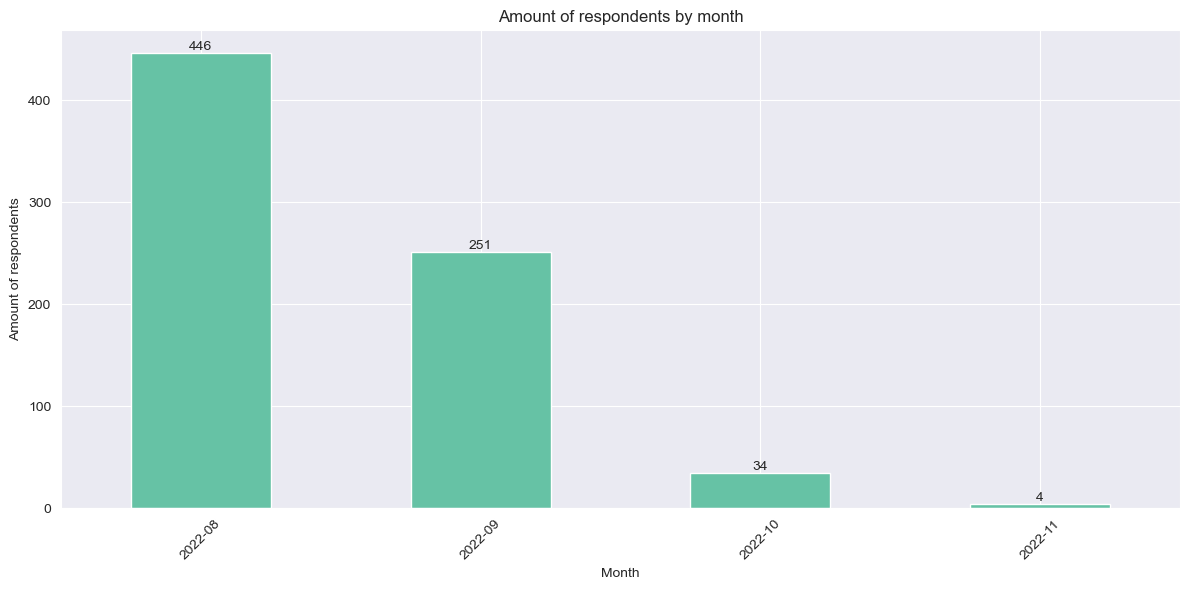

In [44]:
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
ax = respondents_per_month.plot(kind='bar')
plt.title('Amount of respondents by month')
plt.xlabel('Month')
plt.ylabel('Amount of respondents')
plt.xticks(rotation = 45)
plt.grid(True)
for i in ax.patches:
    # Get the X and Y coordinates of each column, as well as its height
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    
    # Displaying text above a column
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom')
plt.tight_layout()
plt.show();

In [45]:
# It seems that the majority of respondents answered between August and October. Perhaps it is not worth using the answers of respondents in November

# Delete rows where the month is November (11th month)
df = df[df['Timestamp'].dt.month != 11]

# Saving the deletion, displaying the first few lines for verification
print(df.tail())

              Timestamp   Age          Primary streaming service  \
726 2022-10-26 19:45:54  26.0                      YouTube Music   
727 2022-10-30 07:24:08  14.0            Other streaming service   
728 2022-10-30 13:13:32  21.0  I do not use a streaming service.   
729 2022-10-30 13:15:26  21.0                            Spotify   
730 2022-10-30 14:37:28  17.0                            Spotify   

     Hours per day  While working  Instrumentalist Composer Fav genre  \
726            1.0            1.0              0.0       No     Metal   
727            7.0            1.0              1.0       No   Country   
728            0.5            0.0              0.0       No       Pop   
729            2.0            1.0              0.0       No       R&B   
730            2.0            1.0              1.0       No      Rock   

    Exploratory  Foreign languages    BPM Frequency [Classical]  \
726         Yes                1.0  136.0             Sometimes   
727         Yes   

In [46]:
# Create a new column 'Year-Month'
df['Year-Month'] = df['Timestamp'].dt.to_period('M')

# Count the number of respondents per month
respondents_per_month = df.groupby('Year-Month').size()

# The extracting of the month and year
df['Year-Month'] = df['Timestamp'].dt.to_period('M')

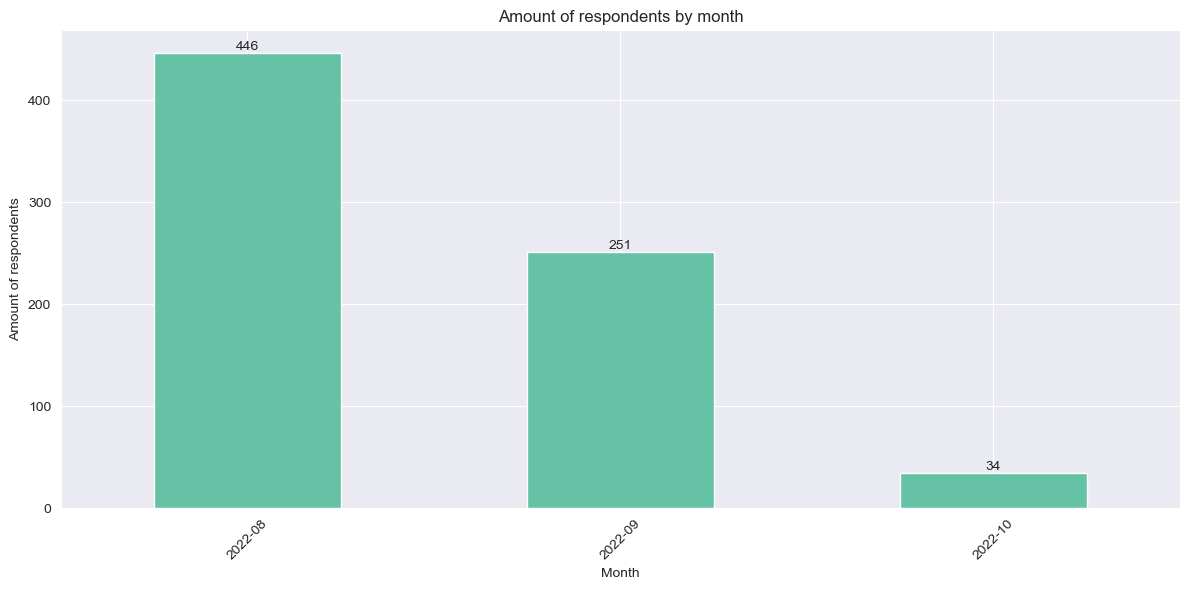

In [90]:
sns.set_style("darkgrid")

plt.figure(figsize=(12, 6))
ax = respondents_per_month.plot(kind='bar')
plt.title('Amount of respondents by month')
plt.xlabel('Month')
plt.ylabel('Amount of respondents')
plt.xticks(rotation = 45)
plt.grid(True)
for i in ax.patches:
    # Get the X and Y coordinates of each column, as well as its height
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    
    # Displaying text above a column
    plt.text(x, y, f'{int(y)}', ha='center', va='bottom')
plt.tight_layout()
plt.show();

# Changing the frequency categories to numeric value

In [47]:
# Determination of columns
columns_to_check = df.columns[11:27]

for column in columns_to_check:
    print(f"Unique values in a column {column}: {np.sort(df[column].unique())}")

Unique values in a column Frequency [Classical]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Country]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [EDM]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Folk]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Gospel]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Hip hop]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Jazz]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [K pop]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Latin]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Lofi]: ['Never' 'Rarely' 'Sometimes' 'Very frequently']
Unique values in a column Frequency [Metal]: ['Never' 'R

In [48]:
# Determining correspondences for replacement
replacement_map = {
    'Never': 0,
    'Rarely': 5,
    'Sometimes': 10,
    'Very frequently': 15
}

# Apply a replacement for the specified columns
df[columns_to_check] = df[columns_to_check].replace(replacement_map)

for column in columns_to_check:
    print(f"Unique values in a column {column}: {np.sort(df[column].unique())}")

Unique values in a column Frequency [Classical]: [ 0  5 10 15]
Unique values in a column Frequency [Country]: [ 0  5 10 15]
Unique values in a column Frequency [EDM]: [ 0  5 10 15]
Unique values in a column Frequency [Folk]: [ 0  5 10 15]
Unique values in a column Frequency [Gospel]: [ 0  5 10 15]
Unique values in a column Frequency [Hip hop]: [ 0  5 10 15]
Unique values in a column Frequency [Jazz]: [ 0  5 10 15]
Unique values in a column Frequency [K pop]: [ 0  5 10 15]
Unique values in a column Frequency [Latin]: [ 0  5 10 15]
Unique values in a column Frequency [Lofi]: [ 0  5 10 15]
Unique values in a column Frequency [Metal]: [ 0  5 10 15]
Unique values in a column Frequency [Pop]: [ 0  5 10 15]
Unique values in a column Frequency [R&B]: [ 0  5 10 15]
Unique values in a column Frequency [Rap]: [ 0  5 10 15]
Unique values in a column Frequency [Rock]: [ 0  5 10 15]
Unique values in a column Frequency [Video game music]: [ 0  5 10 15]


In [49]:
df.to_csv("music_analysis.csv")

# Correlation of values

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731 entries, 0 to 730
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Timestamp                     731 non-null    datetime64[ns]
 1   Age                           731 non-null    float64       
 2   Primary streaming service     731 non-null    object        
 3   Hours per day                 731 non-null    float64       
 4   While working                 731 non-null    float64       
 5   Instrumentalist               731 non-null    float64       
 6   Composer                      731 non-null    object        
 7   Fav genre                     731 non-null    object        
 8   Exploratory                   731 non-null    object        
 9   Foreign languages             731 non-null    float64       
 10  BPM                           625 non-null    float64       
 11  Frequency [Classical]         731 non

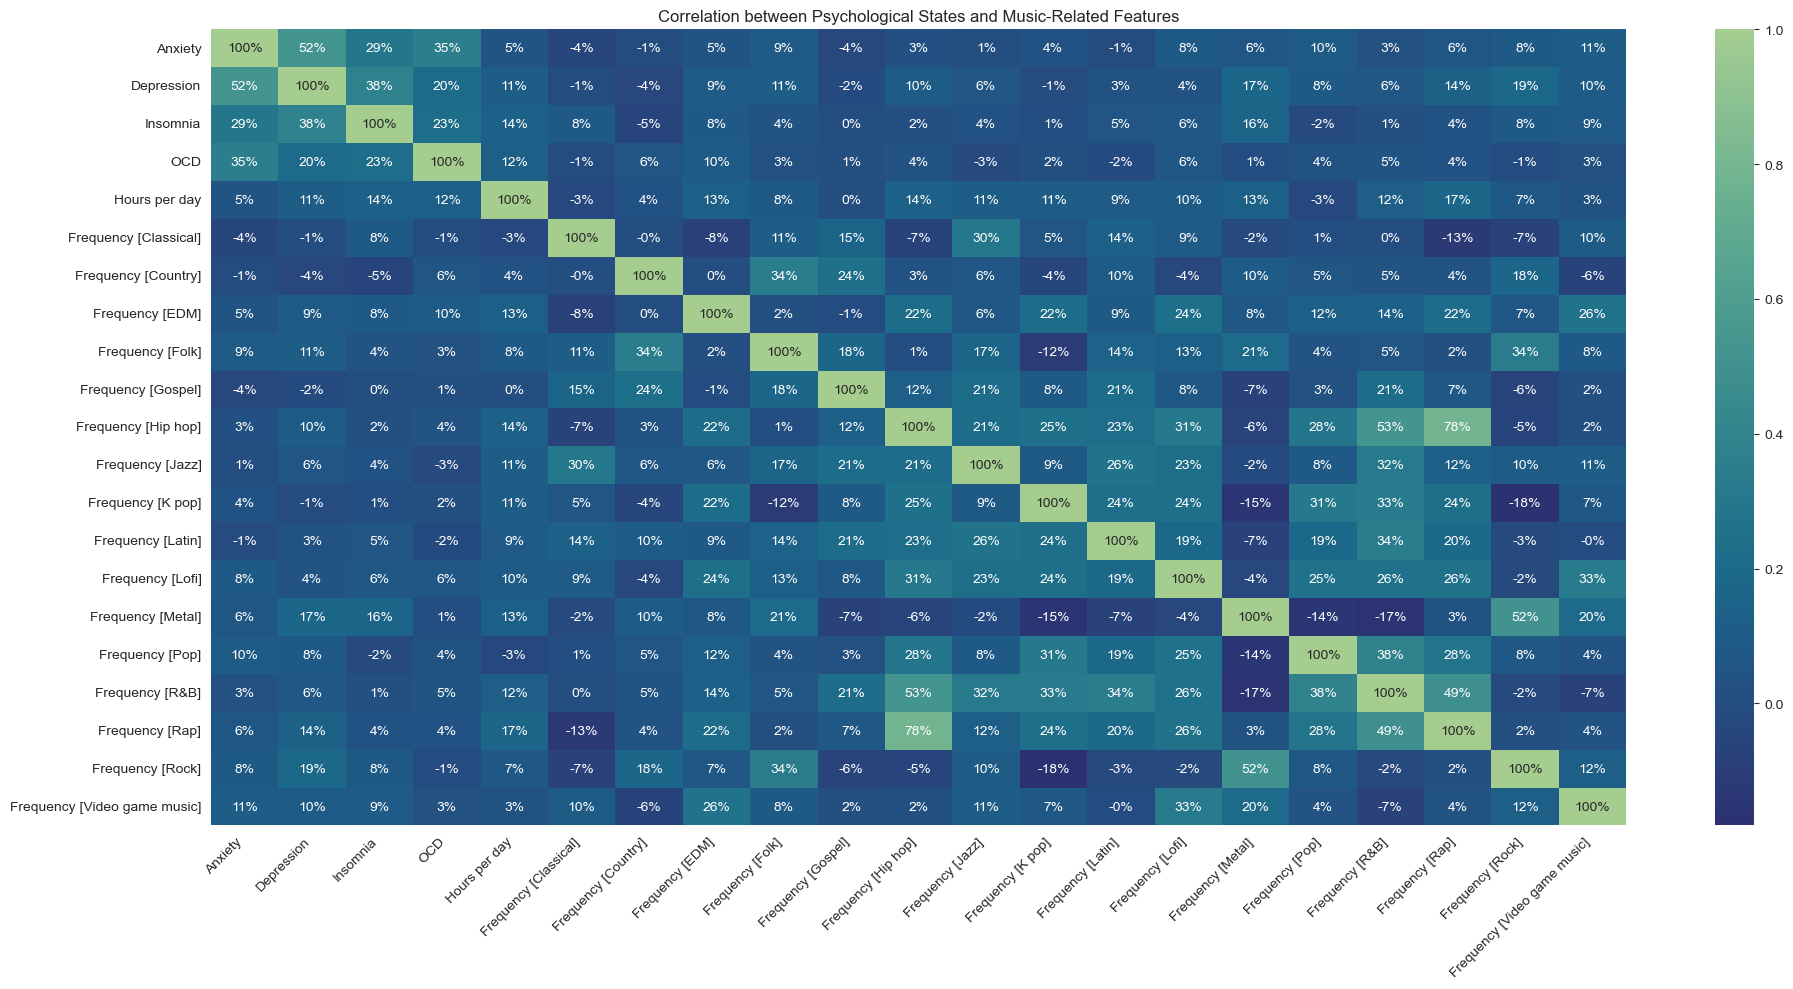

In [95]:
# Correlation matrix of psychological states and music-related features
psych_cols = ['Anxiety',
               'Depression', 
               'Insomnia', 
               'OCD']
music_cols = ['Hours per day', 
              "Frequency [Classical]",
              "Frequency [Country]",
              "Frequency [EDM]",
              "Frequency [Folk]",
              "Frequency [Gospel]",
              "Frequency [Hip hop]",
              "Frequency [Jazz]",
              "Frequency [K pop]",
              "Frequency [Latin]",
              "Frequency [Lofi]",
              "Frequency [Metal]",
              "Frequency [Pop]",
              "Frequency [R&B]",
              "Frequency [Rap]",
              "Frequency [Rock]",
              "Frequency [Video game music]"]

# Create a correlation matrix for the selected columns
correlation_data = df[psych_cols + music_cols].corr()

# Plot the correlation matrix as a heatmap
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(20, 10))
ax = sns.heatmap(correlation_data, cmap="crest_r", annot=True, fmt=".0%", annot_kws={"fontsize": 10})
plt.title("Correlation between Psychological States and Music-Related Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show();

In [51]:
def scatter_plot_with_stats(x, y, xlabel, ylabel, data, ax):
    # Calculate correlation and p-value
    corr_coef, p_value = pearsonr(data[x], data[y])
    
    # Plot scatter plot with regression line
    sns.regplot(x=x, y=y, data=df, scatter_kws={'alpha': 0.5}, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(f'{ylabel} vs {xlabel}\nCorrelation: {corr_coef:.2f}, p-value: {p_value:.3f}')

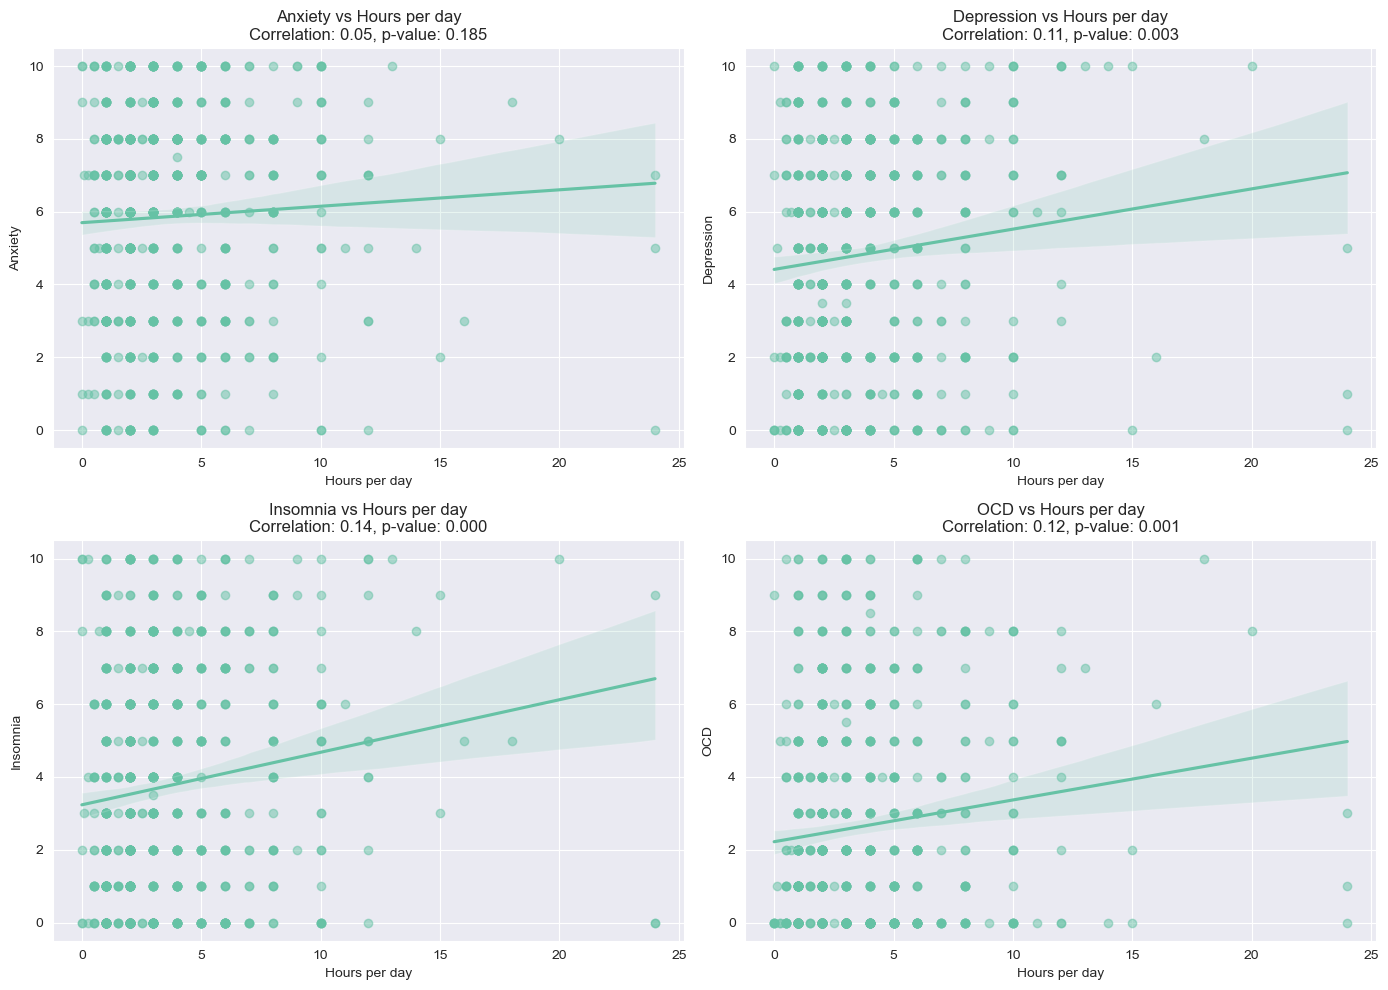

In [52]:
# Creating a 2x2 grid layout for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mapping data to plots
plots = [
    ('Hours per day', 'Anxiety', 'Hours per day', 'Anxiety', axs[0, 0]),
    ('Hours per day', 'Depression', 'Hours per day', 'Depression', axs[0, 1]),
    ('Hours per day', 'Insomnia', 'Hours per day', 'Insomnia', axs[1, 0]),
    ('Hours per day', 'OCD', 'Hours per day', 'OCD', axs[1, 1])
]

# Generating the plots
for x, y, xlabel, ylabel, ax in plots:
    scatter_plot_with_stats(x, y, xlabel, ylabel, df, ax)

plt.tight_layout()
plt.show()

Hours per day listening: Shows positive correlations with anxiety, depression, and insomnia, suggesting that prolonged listening might relate to heightened psychological stress.

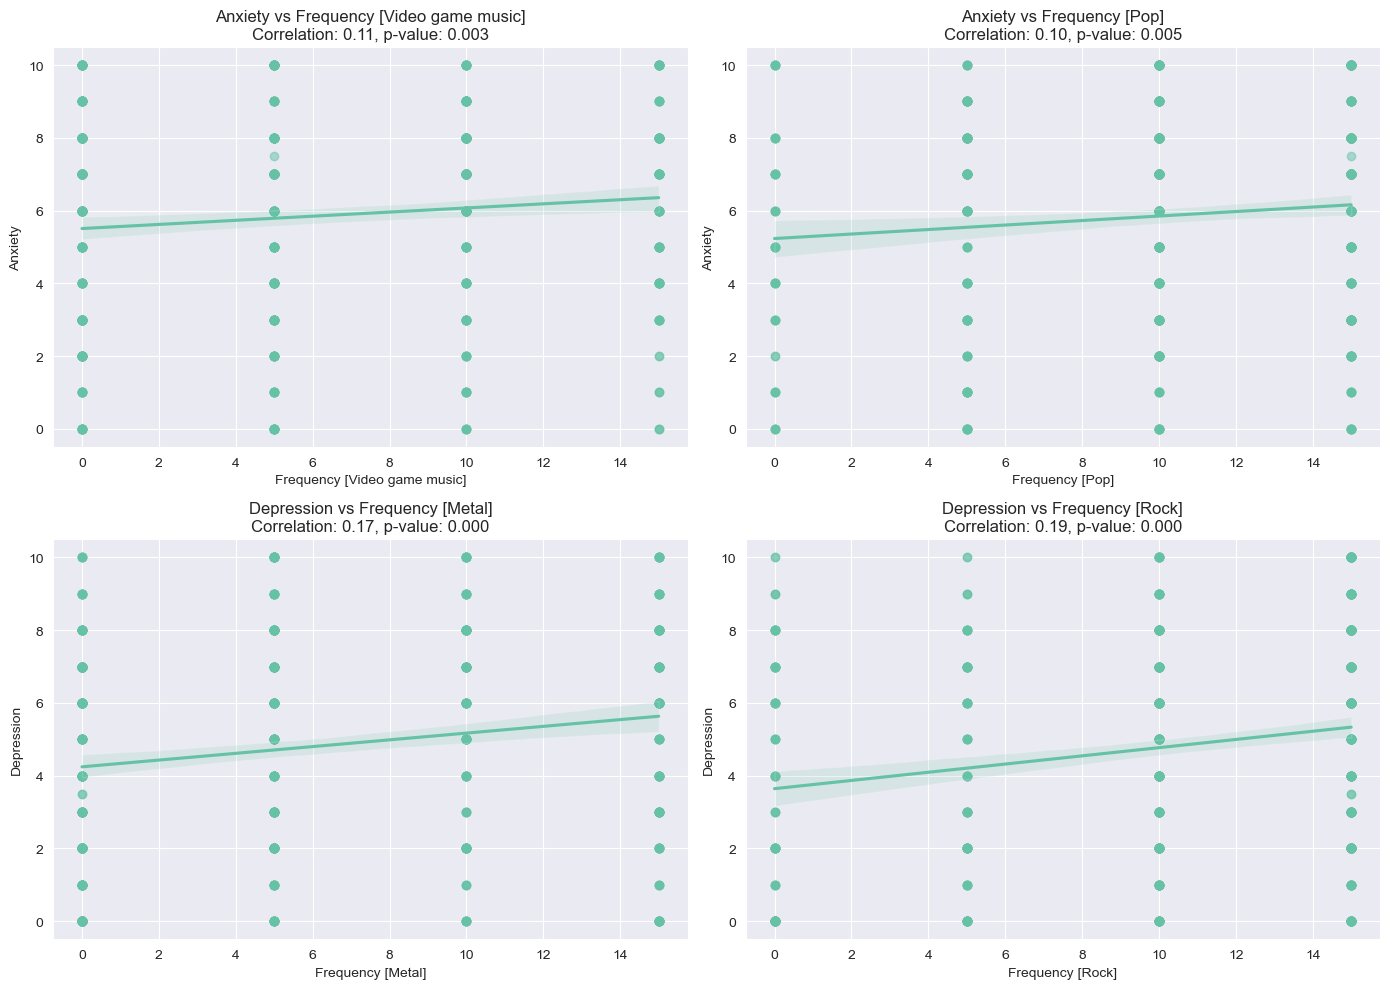

In [53]:
# Creating a 2x2 grid layout for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mapping data to plots
plots = [
    ('Frequency [Video game music]', 'Anxiety', 'Frequency [Video game music]', 'Anxiety', axs[0, 0]),
    ('Frequency [Pop]', 'Anxiety', 'Frequency [Pop]', 'Anxiety', axs[0, 1]),
    ('Frequency [Rock]', 'Depression', 'Frequency [Rock]', 'Depression', axs[1, 1]),
    ('Frequency [Metal]', 'Depression', 'Frequency [Metal]', 'Depression', axs[1, 0])
]

# Generating the plots
for x, y, xlabel, ylabel, ax in plots:
    scatter_plot_with_stats(x, y, xlabel, ylabel, df, ax)

plt.tight_layout()
plt.show()


Anxiety: Shows positive correlations with listening to video game and pop music, indicating potential links between these genres and anxiety levels.
Depression: Rock music shows a positive correlation, suggesting it might relate to higher depression levels, while metal music shows no clear trend.

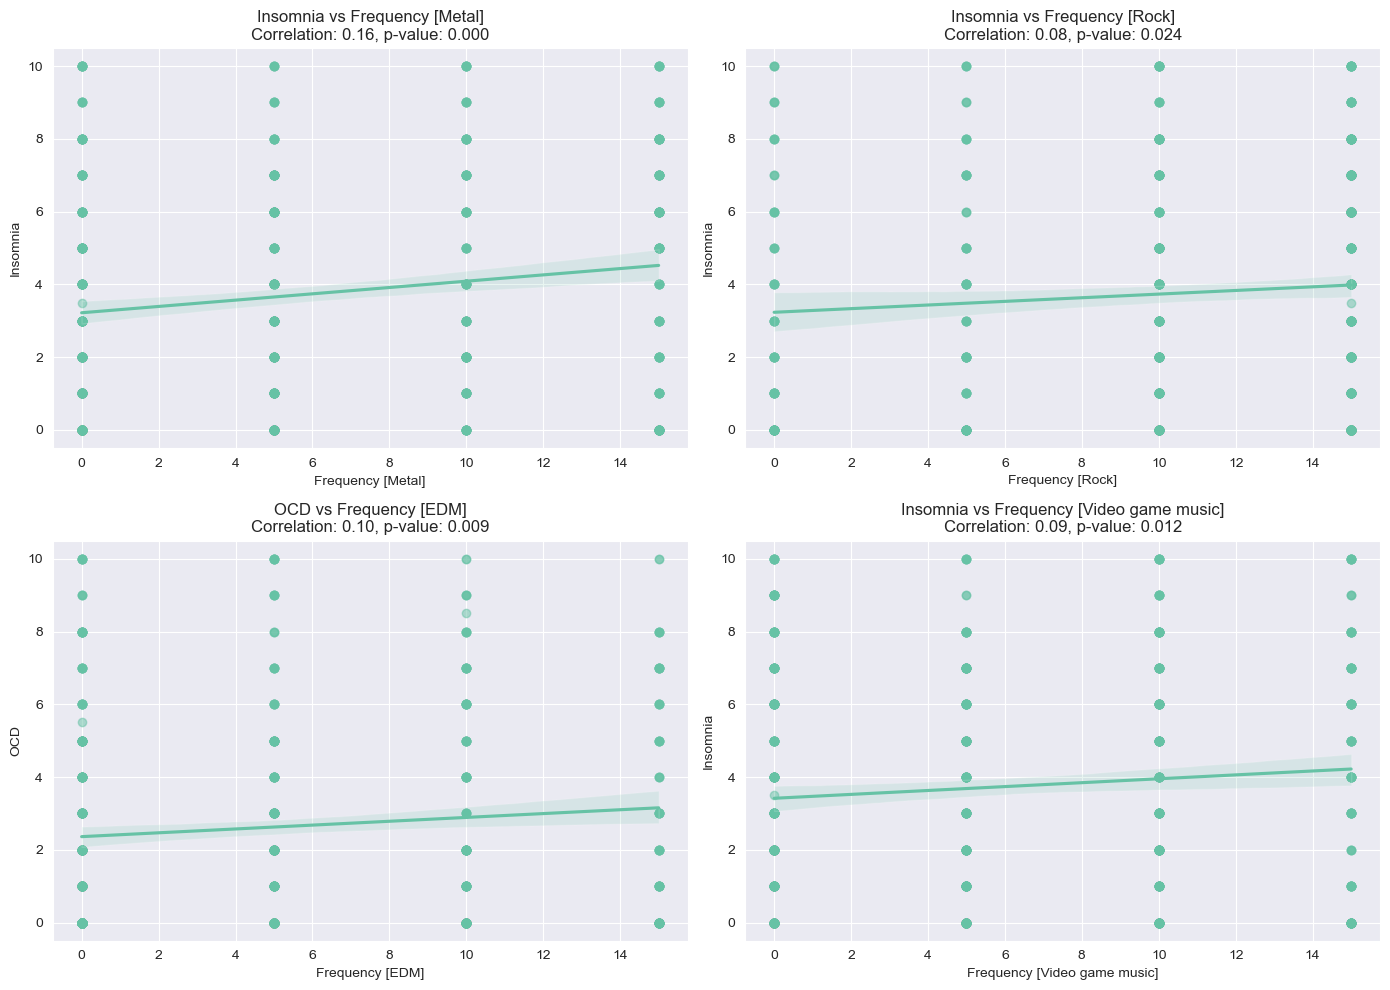

In [54]:
# Creating a 2x2 grid layout for scatter plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Mapping data to plots
plots = [
    ('Frequency [Metal]', 'Insomnia', 'Frequency [Metal]', 'Insomnia', axs[0, 0]),
    ('Frequency [Rock]', 'Insomnia', 'Frequency [Rock]', 'Insomnia', axs[0, 1]),
    ('Frequency [Video game music]', 'Insomnia', 'Frequency [Video game music]', 'Insomnia', axs[1, 1]),
    ('Frequency [EDM]', 'OCD', 'Frequency [EDM]', 'OCD', axs[1, 0])
]

# Generating the plots
for x, y, xlabel, ylabel, ax in plots:
    scatter_plot_with_stats(x, y, xlabel, ylabel, df, ax)

plt.tight_layout()
plt.show()

Insomnia: Shows positive correlations with video game music and rock music, suggesting potential links between these genres and sleep disturbances.
OCD: EDM music shows a weak positive correlation, indicating a potential association between EDM listening and OCD levels.

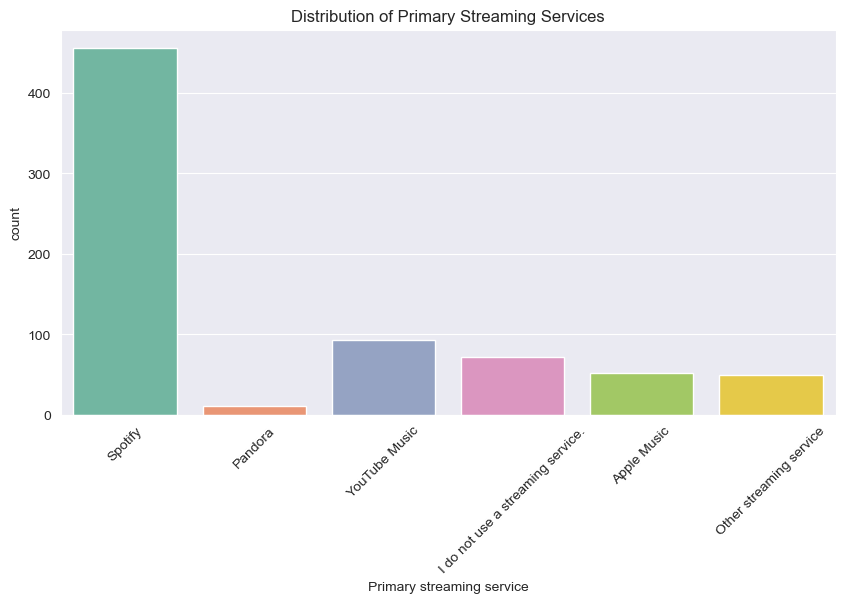

In [55]:
# Distribution of primary streaming services
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Primary streaming service')
plt.xticks(rotation=45)
plt.title('Distribution of Primary Streaming Services')
plt.show();

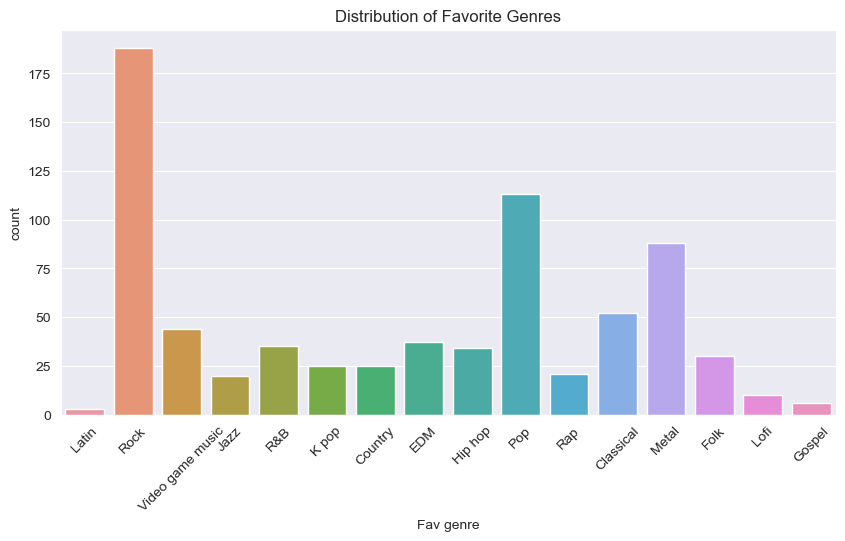

In [56]:
# Distribution of favorite genres
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Fav genre')
plt.xticks(rotation=45)
plt.title('Distribution of Favorite Genres')
plt.show();

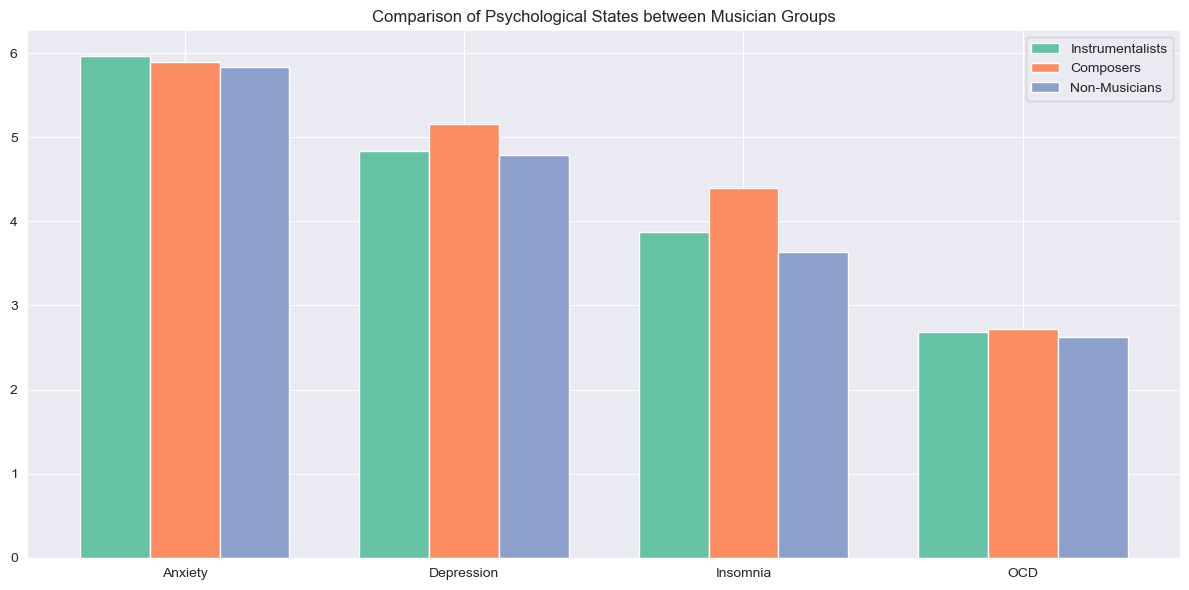

In [57]:
# Comparing psychological states between instrumentalists, composers, and non-musicians
import matplotlib.pyplot as plt

# Separate groups for instrumentalists and composers
instrumentalists = df[df['Instrumentalist'] == 1.0]
composers = df[df['Composer'] == "Yes"]
non_musicians = df[(df['Instrumentalist'] == 0.0) & (df['Composer'] == "No")]

# Average scores for psychological states
psych_states = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

avg_states_instrumentalists = instrumentalists[psych_states].mean()
avg_states_composers = composers[psych_states].mean()
avg_states_non_musicians = non_musicians[psych_states].mean()

# Create a bar plot comparing the averages
x = np.arange(len(psych_states))

width = 0.25
plt.figure(figsize=(12, 6))

plt.bar(x - width, avg_states_instrumentalists, width, label='Instrumentalists')
plt.bar(x, avg_states_composers, width, label='Composers')
plt.bar(x + width, avg_states_non_musicians, width, label='Non-Musicians')

plt.xticks(x, psych_states)
plt.legend()
plt.title("Comparison of Psychological States between Musician Groups")
plt.tight_layout()
plt.show();

Composers: Show higher anxiety, depression and insomnia levels, indicating potential psychological stress related to composing.
Instrumentalists: Have elevated depression levels compared to non-musicians, suggesting a potential link between playing instruments and mood.
OCD: Non-musicians show the highest levels, indicating no clear link between being a musician and OCD.

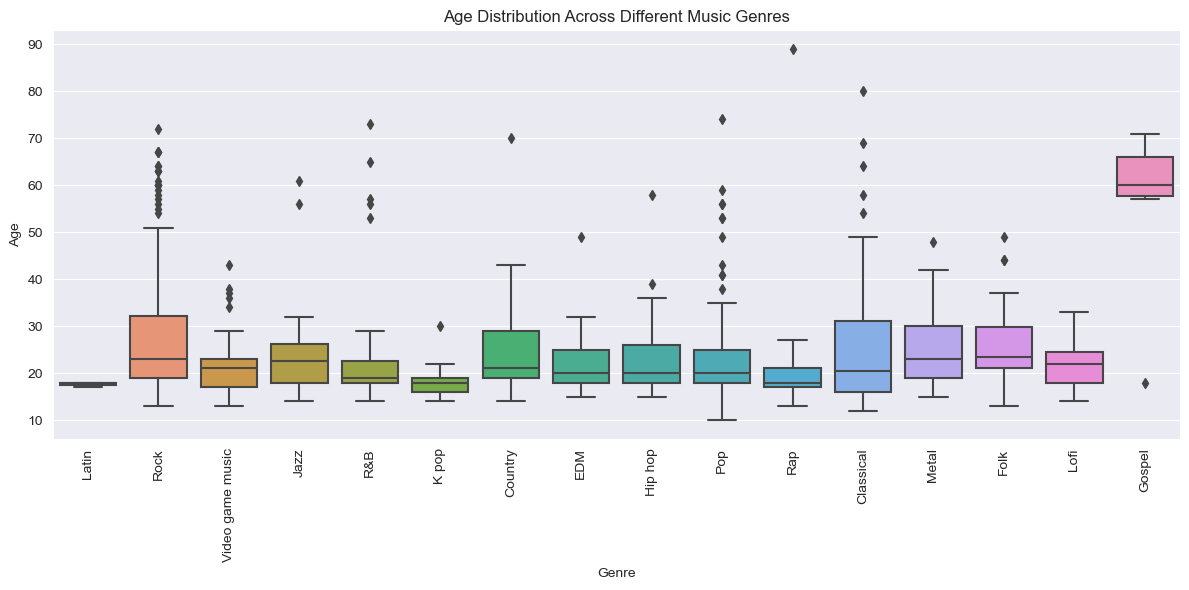

In [59]:
# Extract necessary columns
age_genre_data = df[['Age', 'Fav genre']]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fav genre', y='Age', data=age_genre_data)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Age')
plt.title('Age Distribution Across Different Music Genres')
plt.tight_layout()

# Show the plot
plt.show();